In [32]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [2]:
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe_50.csv", keep_default_na=False)
y = train_df_oe.iloc[:,-1]
X = train_df_oe.iloc[:,:-1]

In [3]:
train_df_oe

,Authors,PublishYear,PublishMonth,PublishDay,Publisher,pagesNumber,twentieth_century,united_state,new_york,survival_guide,...,book provides,well known,real life,tell story,african american,href http,san francisco,new testament,brings together,rating_label
0,8046.0,13.0,3.0,0.0,3917.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,6185.0,12.0,5.0,0.0,1180.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,3220.0,13.0,1.0,6.0,850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,2368.0,13.0,4.0,0.0,493.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,15253.0,13.0,3.0,1.0,3031.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,6887.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23059,3613.0,13.0,3.0,0.0,1941.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23060,2054.0,12.0,1.0,3.0,3468.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23061,7029.0,13.0,2.0,4.0,2741.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Stacking Naive Bayes

In [4]:
GAUSSIAN_FEATURES = ['PublishYear', 'PublishMonth', 'PublishDay', 'pagesNumber']
CATEGORICAL_FEATURES = ['Authors', 'Publisher']
MULTINOMIAL_FEATURES = list(X.columns)[6:]

GAUSSIAN_FEATURES_ID = [1, 2, 3, 5]
CATEGORICAL_FEATURES_ID = [0, 4]
MULTINOMIAL_FEATURES_ID = range(6, X.shape[1])

In [5]:
N_CAT_VALUES = [19244, 4519]  # number of unique authors, publishers

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [7]:
# Split the training set for each Naive Bayes base classifier
X_gaussian = X[GAUSSIAN_FEATURES]
X_categorical = X[CATEGORICAL_FEATURES]
X_multinomial = X[MULTINOMIAL_FEATURES]

## Gaussian NB for PublishYear and pagesNumber

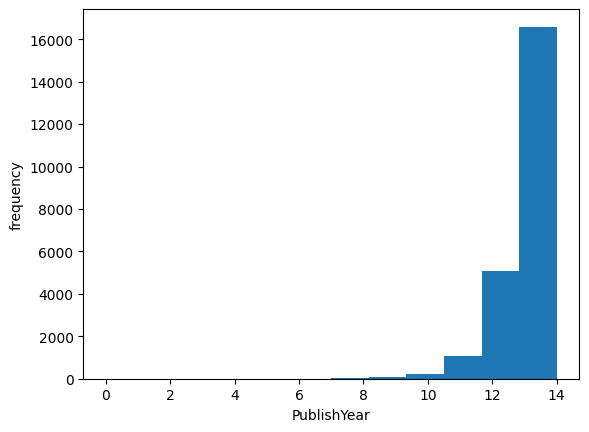

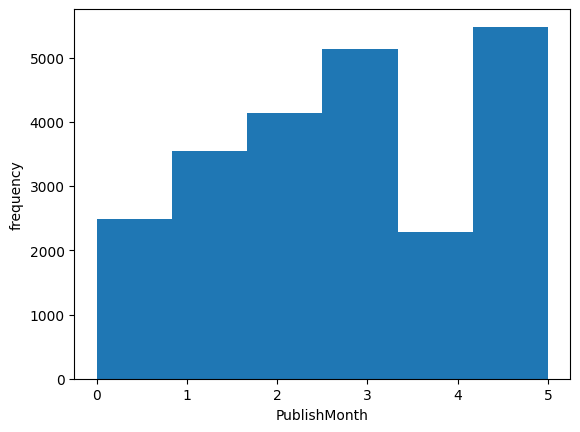

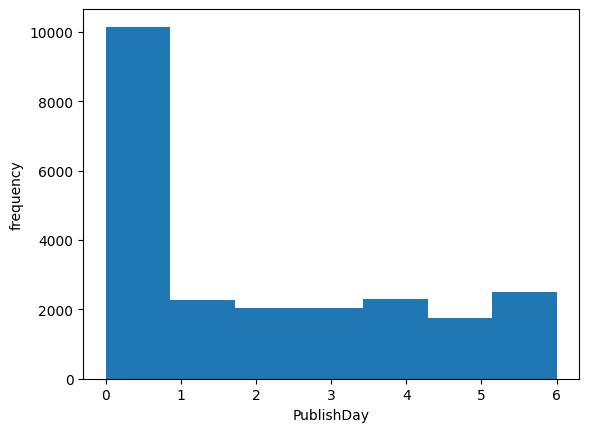

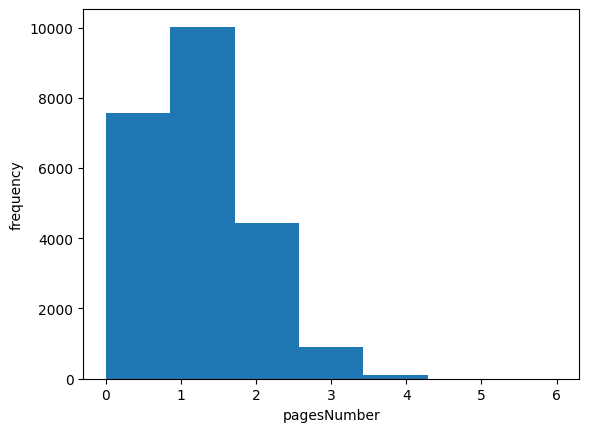

In [8]:
# check distribution of PublishYear and pagesNumber
for feature in GAUSSIAN_FEATURES:
    hist_plot(X, feature, bins=X[feature].nunique())

GaussianNB prediction took 0.1030879020690918 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision                 0.0              0.0                0.0   
3.0_recall                    0.0              0.0                0.0   
3.0_f1-score                  0.0              0.0                0.0   
4.0_precision                 0.0              0.0                0.0   
4.0_recall                    0.0              0.0                0.0   
4.0_f1-score                  0.0              0.0                0.0   
5.0_precision                 0.0              0.0                0.0   
5.0_recall                    0.0              0.0                0.0   
5.0_f1-score                  0.0              0.0                0.0   
accuracy                      0.0              0.0                0.0   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.703349         0.997532           0.825000

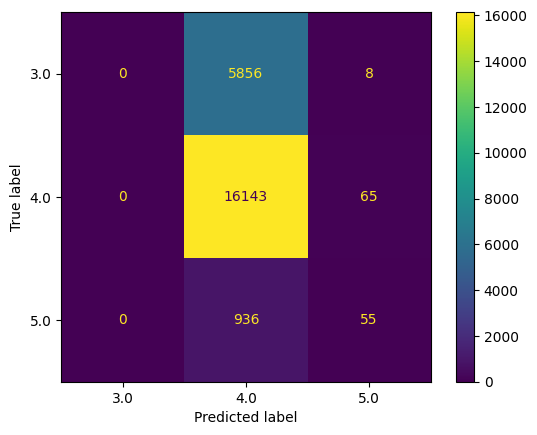

test_3.0_precision    0.000000
test_3.0_recall       0.000000
test_3.0_f1-score     0.000000
test_4.0_precision    0.703859
test_4.0_recall       0.995990
test_4.0_f1-score     0.824822
test_5.0_precision    0.433455
test_5.0_recall       0.055505
test_5.0_f1-score     0.098078
test_accuracy         0.702337
dtype: float64

In [9]:
gnb = GaussianNB()
gnb_pred, gnb_report = cross_val_report(gnb, X_gaussian, y)
gnb_report

## Categorical NB for Authors and Publisher

In [10]:
# Tuning for alpha smoothing
cnb = CategoricalNB(min_categories = N_CAT_VALUES)
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(cnb, param_grid, X_categorical, y)

# larger alpha -> overestimate the likelihood
# could be because there is more samples with label4 ratings, and the missing values are randomly 
# distributed across the dataset, hence more samples with label4 rating with missing values
# -> likelihood of P(x|c=4) overestimated -> more samples predicted to have label=4

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.1},0.452329,0.021165,7,0.469817,0.028781,1,0.460606,0.021915,1,...,14,0.450898,0.044399,1,0.262193,0.031999,4,0.632875,0.010143,14
1,{'alpha': 0.2},0.473283,0.024629,6,0.407744,0.028450,3,0.437709,0.023871,2,...,13,0.388306,0.048403,2,0.258726,0.035059,5,0.656506,0.009177,13
2,{'alpha': 0.3},0.428745,0.018688,12,0.418143,0.024585,2,0.423247,0.020596,3,...,12,0.222755,0.052466,3,0.308640,0.060431,1,0.677406,0.009028,12
3,{'alpha': 0.4},0.433278,0.020911,11,0.393243,0.021996,4,0.412169,0.020424,4,...,11,0.214694,0.055515,4,0.301732,0.065658,2,0.681568,0.010143,11
4,{'alpha': 0.5},0.434082,0.023026,10,0.369538,0.019023,5,0.399118,0.019815,5,...,10,0.177388,0.048943,5,0.265900,0.060795,3,0.683866,0.010585,10
5,{'alpha': 0.6},0.438044,0.022533,8,0.353509,0.020037,6,0.391097,0.019650,6,...,8,0.157265,0.043515,6,0.243350,0.055683,6,0.686771,0.010165,7
6,{'alpha': 0.7},0.437336,0.023711,9,0.337647,0.023262,7,0.380919,0.022571,7,...,9,0.130082,0.044608,7,0.208791,0.062982,7,0.687378,0.009922,6
7,{'alpha': 0.8},0.426739,0.022831,13,0.322811,0.023710,8,0.367414,0.022845,8,...,5,0.100857,0.039106,8,0.174593,0.061716,8,0.685861,0.009440,8
8,{'alpha': 0.9},0.424329,0.024245,14,0.313604,0.024955,9,0.360501,0.024363,9,...,4,0.089735,0.037787,9,0.158243,0.062543,9,0.685513,0.009489,9
9,{'alpha': 1.0},0.570783,0.040940,2,0.215031,0.028377,10,0.311859,0.034679,10,...,3,0.078653,0.040052,10,0.139846,0.066746,10,0.720374,0.008002,1


CategoricalNB prediction took 0.12231802940368652 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.593886         0.231687           0.333333   
3.0_recall               0.560000         0.214651           0.310345   
3.0_f1-score             0.562212         0.208191           0.303861   
4.0_precision            0.581498         0.225256           0.324723   
4.0_recall               0.576613         0.244027           0.342926   
4.0_f1-score             0.551282         0.220137           0.314634   
5.0_precision            0.572864         0.194539           0.290446   
5.0_recall               0.580952         0.208191           0.306533   
5.0_f1-score             0.544186         0.199319           0.291771   
accuracy                 0.546392         0.180579           0.271447   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.739215         0.940777           0.82

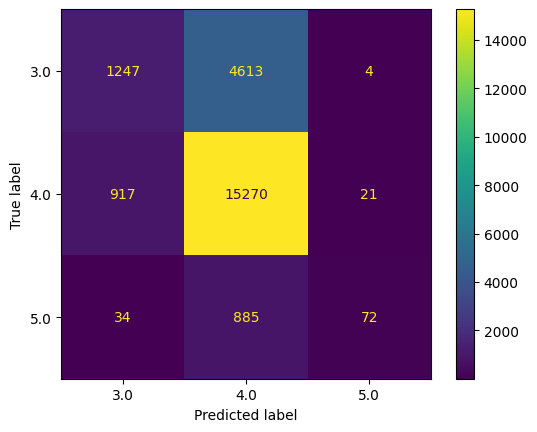

test_3.0_precision    0.566989
test_3.0_recall       0.212658
test_3.0_f1-score     0.309002
test_4.0_precision    0.735290
test_4.0_recall       0.942127
test_4.0_f1-score     0.825944
test_5.0_precision    0.778056
test_5.0_recall       0.072697
test_5.0_f1-score     0.131147
test_accuracy         0.719291
dtype: float64

In [11]:
cnb = CategoricalNB(alpha=1, min_categories = N_CAT_VALUES)
cnb_pred, cnb_report = cross_val_report(cnb, X_categorical, y)
cnb_report

## Multinomial NB for Name and Description

In [12]:
# Tuning for alpha smoothing
mnb = MultinomialNB()
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(mnb, param_grid, X_multinomial, y)

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.1},0.667630,0.224055,1,0.011255,0.005917,1,0.022055,0.011441,1,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705025,0.002008,14
1,{'alpha': 0.2},0.667630,0.224055,1,0.011255,0.005917,1,0.022055,0.011441,1,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705069,0.002000,9
2,{'alpha': 0.3},0.667630,0.224055,1,0.011255,0.005917,1,0.022055,0.011441,1,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705069,0.002000,9
3,{'alpha': 0.4},0.667630,0.224055,1,0.011255,0.005917,1,0.022055,0.011441,1,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705069,0.002000,9
4,{'alpha': 0.5},0.667630,0.224055,1,0.011255,0.005917,1,0.022055,0.011441,1,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705069,0.002000,9
5,{'alpha': 0.6},0.665357,0.225508,6,0.011084,0.005693,6,0.021732,0.011028,6,...,9,0.025245,0.022115,1,0.048037,0.041364,9,0.705025,0.002040,13
6,{'alpha': 0.7},0.665357,0.225508,6,0.011084,0.005693,6,0.021732,0.011028,6,...,1,0.025245,0.022115,1,0.048312,0.041536,1,0.705199,0.001965,1
7,{'alpha': 0.8},0.665357,0.225508,6,0.011084,0.005693,6,0.021732,0.011028,6,...,1,0.025245,0.022115,1,0.048312,0.041536,1,0.705199,0.001965,1
8,{'alpha': 0.9},0.665357,0.225508,6,0.011084,0.005693,6,0.021732,0.011028,6,...,1,0.025245,0.022115,1,0.048312,0.041536,1,0.705199,0.001965,1
9,{'alpha': 1.0},0.665357,0.225508,6,0.011084,0.005693,6,0.021732,0.011028,6,...,1,0.025245,0.022115,1,0.048312,0.041536,1,0.705199,0.001965,1


MultinomialNB prediction took 0.1842489242553711 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.411765         0.011925           0.023179   
3.0_recall               0.818182         0.015332           0.030100   
3.0_f1-score             0.666667         0.006826           0.013514   
4.0_precision            0.538462         0.011945           0.023372   
4.0_recall               0.769231         0.017065           0.033389   
4.0_f1-score             0.454545         0.008532           0.016750   
5.0_precision            0.846154         0.018771           0.036728   
5.0_recall               0.571429         0.006826           0.013491   
5.0_f1-score             0.714286         0.008518           0.016835   
accuracy                 0.714286         0.008518           0.016835   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.703801         0.993831           0.824

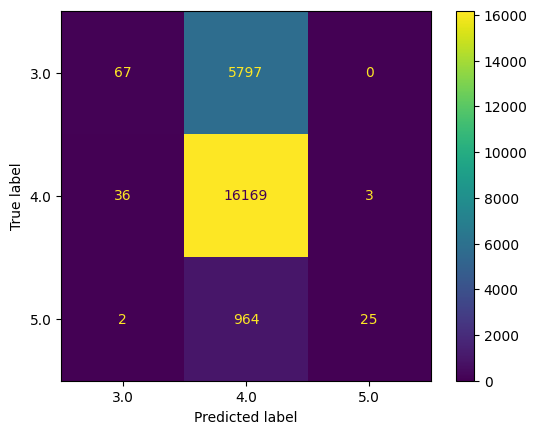

test_3.0_precision    0.650500
test_3.0_recall       0.011426
test_3.0_f1-score     0.022419
test_4.0_precision    0.705147
test_4.0_recall       0.997594
test_4.0_f1-score     0.826256
test_5.0_precision    0.926667
test_5.0_recall       0.025242
test_5.0_f1-score     0.048778
test_accuracy         0.705069
dtype: float64

In [13]:
# better than complementNB and gaussianNB
mnb = MultinomialNB(alpha=0.1)
mnb_pred, mnb_report = cross_val_report(mnb, X_multinomial, y)
mnb_report

## Categorical NB for final prediction

CategoricalNB prediction took 0.25380897521972656 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.580247         0.240204           0.339759   
3.0_recall               0.561404         0.218058           0.314110   
3.0_f1-score             0.568182         0.213311           0.310174   
4.0_precision            0.576923         0.230375           0.329268   
4.0_recall               0.577075         0.249147           0.348033   
4.0_f1-score             0.552301         0.225256           0.320000   
5.0_precision            0.580488         0.203072           0.300885   
5.0_recall               0.579439         0.211604           0.310000   
5.0_f1-score             0.555046         0.206133           0.300621   
accuracy                 0.550505         0.185690           0.277707   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.739873         0.935225           0.82

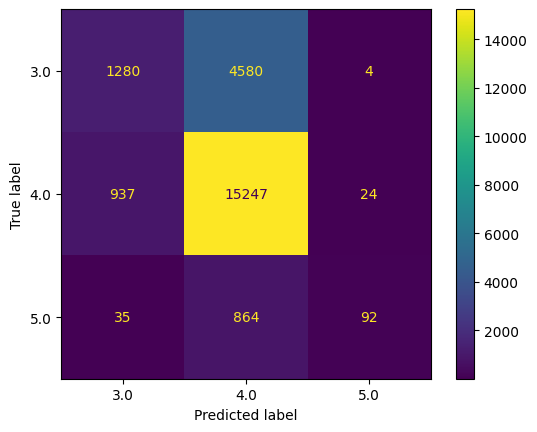

test_3.0_precision    0.568161
test_3.0_recall       0.218285
test_3.0_f1-score     0.315056
test_4.0_precision    0.736918
test_4.0_recall       0.940709
test_4.0_f1-score     0.826420
test_5.0_precision    0.789032
test_5.0_recall       0.092889
test_5.0_f1-score     0.164381
test_accuracy         0.720592
dtype: float64

In [14]:
X_preds = pd.DataFrame({'GaussianNB_preds' : gnb_pred,
                        'CategoricalNB_preds' : cnb_pred,
                        'MultinomialNB_preds' : mnb_pred})

# meta-classifier
stack_nb = CategoricalNB()
stack_nb.fit(X_preds, y)  # input = base models' predictions
cross_val_report(stack_nb, X_preds, y)[1]

## Altogether: Generate Model

In [15]:
from sklearn.base import ClassifierMixin, BaseEstimator

In [16]:
class StackingNB(ClassifierMixin, BaseEstimator):

    def __init__(self, classifiers, metaclassifier, feature_sets):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = feature_sets

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # base classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers
        self.metaclassifier.fit(X_meta, y) # # output of the base classifiers = input for meta-classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({get_model_name(self.classifiers[i])+'_pred' : y_hats[i] 
                                for i in range(len(self.classifiers))})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X): 
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    # for completeness
    def predict_proba(self, X): 
        X_meta = self._predict_base(X)
        return self.metaclassifier.predict_proba(X_meta)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

## Attempt 1: Using all features

StackingNB prediction took 0.49949193000793457 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.593886         0.231687           0.333333   
3.0_recall               0.560000         0.214651           0.310345   
3.0_f1-score             0.565611         0.213311           0.309789   
4.0_precision            0.581498         0.225256           0.324723   
4.0_recall               0.576613         0.244027           0.342926   
4.0_f1-score             0.551282         0.220137           0.314634   
5.0_precision            0.572864         0.194539           0.290446   
5.0_recall               0.580952         0.208191           0.306533   
5.0_f1-score             0.544186         0.199319           0.291771   
accuracy                 0.546392         0.180579           0.271447   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.739215         0.940777           0.82790

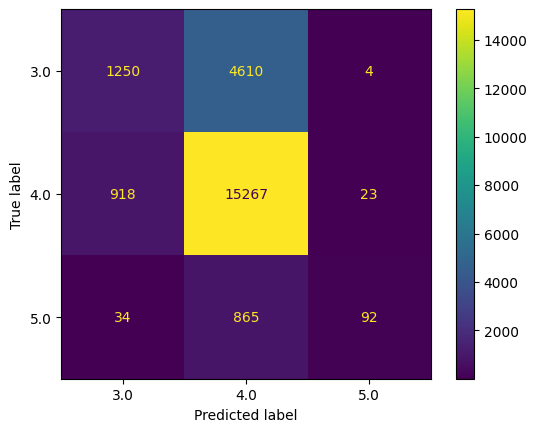

test_3.0_precision    0.567328
test_3.0_recall       0.213170
test_3.0_f1-score     0.309595
test_4.0_precision    0.736068
test_4.0_recall       0.941942
test_4.0_f1-score     0.826363
test_5.0_precision    0.799032
test_5.0_recall       0.092889
test_5.0_f1-score     0.164534
test_accuracy         0.720158
dtype: float64

In [17]:
initial_feature_sets = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]

base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=1, min_categories=N_CAT_VALUES),
                    MultinomialNB(alpha=0.1)]

meta_classifier = CategoricalNB()
snb = StackingNB(base_classifiers, meta_classifier, initial_feature_sets)
snb.fit(X, y)

y_pred, snb_report = cross_val_report(snb, X, y)
snb_report

## Attempt 2: Using selected features

In [18]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X[MULTINOMIAL_FEATURES], y)
pvals = pd.DataFrame(chi2_selector.pvalues_, index=chi2_selector.feature_names_in_, columns=['p-value'])
filtered_mn_features = pvals[pvals['p-value'] < 0.01].index.tolist()
print(len(filtered_mn_features), "multinomial features are significant.")
filtered_mn_features

25 multinomial features are significant.


['world_war',
 'field_guide',
 'science_fiction',
 'berenstain_bear',
 'step_step',
 'life_time',
 'short_introduction',
 'study_bible',
 'little_book',
 'year ago',
 'high school',
 'york time',
 'first book',
 'civil war',
 'also includes',
 'along way',
 'men woman',
 'book also',
 'award winning',
 'new edition',
 'nineteenth century',
 'science fiction',
 'real life',
 'href http',
 'brings together']

In [19]:
f_selector = SelectKBest(k=2)
X_filtered_f = f_selector.fit_transform(X[GAUSSIAN_FEATURES + CATEGORICAL_FEATURES], y)
fvals = pd.DataFrame(f_selector.pvalues_, index=f_selector.feature_names_in_, columns=['F-value'])
fvals.sort_values('F-value')

,F-value
pagesNumber,1.939041e-44
PublishYear,4.982373e-33
PublishDay,3.779786e-03
Authors,3.607589e-01
Publisher,8.375307e-01
PublishMonth,8.957847e-01


In [20]:
filtered_gaus_features = ['pagesNumber', 'PublishYear']
filtered_cat_features = ['Authors']
filtered_feature_sets = [filtered_gaus_features, filtered_cat_features, filtered_mn_features]
X_filtered = X[filtered_gaus_features + filtered_cat_features + filtered_mn_features]
X_filtered

,pagesNumber,PublishYear,Authors,world_war,field_guide,science_fiction,berenstain_bear,step_step,life_time,short_introduction,...,along way,men woman,book also,award winning,new edition,nineteenth century,science fiction,real life,href http,brings together
0,0.0,13.0,8046.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,12.0,6185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,13.0,3220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,13.0,2368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13.0,15253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,0.0,12.0,6887.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,0.0,13.0,3613.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,0.0,12.0,2054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,0.0,13.0,7029.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


StackingNB prediction took 0.3926680088043213 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.610256         0.202726           0.304348   
3.0_recall               0.584795         0.170358           0.263852   
3.0_f1-score             0.622340         0.199659           0.302326   
4.0_precision            0.636364         0.179181           0.279627   
4.0_recall               0.690909         0.194539           0.303595   
4.0_f1-score             0.638037         0.177474           0.277704   
5.0_precision            0.611765         0.177474           0.275132   
5.0_recall               0.617834         0.165529           0.261104   
5.0_f1-score             0.642045         0.192504           0.296199   
accuracy                 0.646259         0.161840           0.258856   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.738795         0.945713           0.829545

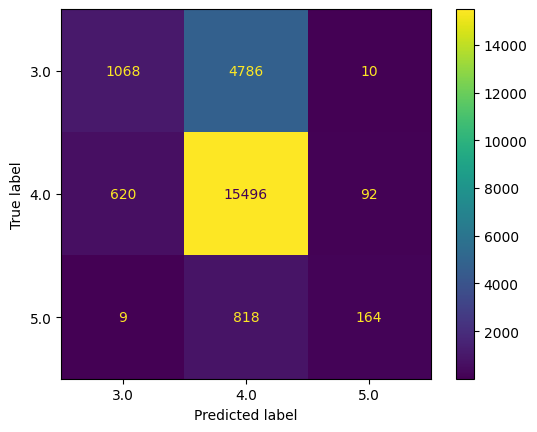

test_3.0_precision    0.630060
test_3.0_recall       0.182128
test_3.0_f1-score     0.282274
test_4.0_precision    0.734421
test_4.0_recall       0.956071
test_4.0_f1-score     0.830704
test_5.0_precision    0.623955
test_5.0_recall       0.165495
test_5.0_f1-score     0.260323
test_accuracy         0.725318
dtype: float64

In [21]:
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]),
                    MultinomialNB(alpha=0.1)]

snb = StackingNB(base_classifiers, meta_classifier, filtered_feature_sets)
snb.fit(X_filtered, y)

y_pred, snb_report = cross_val_report(snb, X_filtered, y)
snb_report

## Stacking CV Classifier

In [22]:
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-4-stacking-of-classifiers-that-operate-on-different-feature-subsets
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [23]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.1))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=LogisticRegression(),
                            random_state=30027)

cvsnb.fit(X_filtered, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.1,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['world_war'...
                                                                        'little_book',
                                                                        'year '
                                                                        'ago',
                                                                        'high '
                                                                        'school',
                                                                        'york '
                                                                        'time',
                                                                        'first '
                                                                        'book',
                                                                        'civil '
                                                                        'war',
                                                                        'also '
                                                                        'includes',
                                                                        'along '
                                                                        'way',
                                                                        'men '
                                                                        'woman',
                                                                        'book '
                                                                        'also',
                                                                        'award '
                                                                        'winning',
                                                                        'new '
                                                                        'edition',
                                                                        'nineteenth '
                                                                        'century',
                                                                        'science '
                                                                        'fiction',
                                                                        'real '
                                                                        'life',
                                                                        'href '
                                                                        'http',
                                                                        'brings '
                                                                        'together'])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.1))])],
                     meta_classifier=LogisticRegression(), random_state=30027)

## Hyperparameter tuning

In [24]:
cvsnb.get_params()

{'classifiers': [Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['pagesNumber', 'PublishYear'])),
                  ('gaussiannb', GaussianNB())]),
  Pipeline(steps=[('columnselector', ColumnSelector(cols=['Authors'])),
                  ('categoricalnb',
                   CategoricalNB(alpha=0.1, min_categories=19244))]),
  Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['world_war', 'field_guide',
                                        'science_fiction', 'berenstain_bear',
                                        'step_step', 'life_time',
                                        'short_introduction', 'study_bible',
                                        'little_book', 'year ago', 'high school',
                                        'york time', 'first book', 'civil war',
                                        'also includes', 'along way', 'men woman',
                                        'book also', 'award winning',
      

In [25]:
param_grid = {'pipeline-2__categoricalnb__alpha': [i/100 for i in range(1,42,5)], 
              'pipeline-3__multinomialnb__alpha': [i/100 for i in range(1,42,5)]}

grid = tune_hyperparameter(cvsnb, param_grid, X_filtered, y, cv=2)
grid

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.1s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.21; tot

[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21

[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.26; total time=   0.1s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.1s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.1s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.2s


,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.615956,0.005096,55,0.139495,0.001364,3,0.227474,0.002161,3,...,59,0.042386,0.004079,1,0.081066,0.007566,1,0.718077,0.000942,3
1,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.615956,0.005096,55,0.139495,0.001364,3,0.227474,0.002161,3,...,59,0.042386,0.004079,1,0.081066,0.007566,1,0.718077,0.000942,3
2,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.615956,0.005096,55,0.139495,0.001364,3,0.227474,0.002161,3,...,59,0.042386,0.004079,1,0.081066,0.007566,1,0.718077,0.000942,3
3,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.615956,0.005096,55,0.139495,0.001364,3,0.227474,0.002161,3,...,59,0.042386,0.004079,1,0.081066,0.007566,1,0.718077,0.000942,3
4,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.615956,0.005096,55,0.139495,0.001364,3,0.227474,0.002161,3,...,59,0.042386,0.004079,1,0.081066,0.007566,1,0.718077,0.000942,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"{'pipeline-2__categoricalnb__alpha': 0.41, 'pi...",0.624699,0.000301,10,0.131139,0.001535,73,0.216768,0.002079,73,...,1,0.023210,0.001033,56,0.045365,0.001972,56,0.717383,0.000074,60
77,"{'pipeline-2__categoricalnb__alpha': 0.41, 'pi...",0.624699,0.000301,10,0.131139,0.001535,73,0.216768,0.002079,73,...,1,0.023210,0.001033,56,0.045365,0.001972,56,0.717383,0.000074,60
78,"{'pipeline-2__categoricalnb__alpha': 0.41, 'pi...",0.624699,0.000301,10,0.131139,0.001535,73,0.216768,0.002079,73,...,1,0.023210,0.001033,56,0.045365,0.001972,56,0.717383,0.000074,60
79,"{'pipeline-2__categoricalnb__alpha': 0.41, 'pi...",0.624699,0.000301,10,0.131139,0.001535,73,0.216768,0.002079,73,...,1,0.023210,0.001033,56,0.045365,0.001972,56,0.717383,0.000074,60


In [26]:
r = re.compile('(^(rank_test).*(f1-score|accuracy)$)|(mean_test_accuracy)|(params)')
score_metrics = list(filter(r.match, grid.columns))
grid.loc[grid['rank_test_5.0_precision'] < 20][score_metrics]

,params,rank_test_3.0_f1-score,rank_test_4.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,rank_test_accuracy
36,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
37,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
38,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",1,10,37,0.718423,1
39,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",1,10,37,0.718423,1
40,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
41,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
42,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
43,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,17,37,0.717947,12
44,"{'pipeline-2__categoricalnb__alpha': 0.21, 'pi...",39,68,63,0.717426,59
45,"{'pipeline-2__categoricalnb__alpha': 0.26, 'pi...",46,41,45,0.717773,27


In [27]:
grid.loc[[7]]['params'].values

array([{'pipeline-2__categoricalnb__alpha': 0.01, 'pipeline-3__multinomialnb__alpha': 0.36}],
      dtype=object)

In [28]:
grid.loc[grid['rank_test_accuracy'] < 20][score_metrics]
grid.iloc[23,0]

{'pipeline-2__categoricalnb__alpha': 0.11,
 'pipeline-3__multinomialnb__alpha': 0.26}

In [29]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.11, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.26))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=CategoricalNB(),
                            random_state=30027)

cvsnb.fit(X_filtered, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.11,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['world_war...
                                                                        'little_book',
                                                                        'year '
                                                                        'ago',
                                                                        'high '
                                                                        'school',
                                                                        'york '
                                                                        'time',
                                                                        'first '
                                                                        'book',
                                                                        'civil '
                                                                        'war',
                                                                        'also '
                                                                        'includes',
                                                                        'along '
                                                                        'way',
                                                                        'men '
                                                                        'woman',
                                                                        'book '
                                                                        'also',
                                                                        'award '
                                                                        'winning',
                                                                        'new '
                                                                        'edition',
                                                                        'nineteenth '
                                                                        'century',
                                                                        'science '
                                                                        'fiction',
                                                                        'real '
                                                                        'life',
                                                                        'href '
                                                                        'http',
                                                                        'brings '
                                                                        'together'])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.26))])],
                     meta_classifier=CategoricalNB(), random_state=30027)

StackingCVClassifier prediction took 0.7744522094726562 seconds
   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.601990    0.206133      0.307107       0.738521    0.942628   
1       0.590909    0.177172      0.272608       0.731372    0.950648   
2       0.621762    0.204778      0.308087       0.736968    0.950648   
3       0.630682    0.189420      0.291339       0.735795    0.958667   
4       0.693642    0.204778      0.316206       0.738739    0.961135   
5       0.629412    0.182594      0.283069       0.735447    0.958667   
6       0.629834    0.194539      0.297262       0.736441    0.954966   
7       0.619632    0.172355      0.269693       0.734249    0.956200   
8       0.655556    0.201022      0.307692       0.737042    0.956790   
9       0.655629    0.168654      0.268293       0.731925    0.962346   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.828184       0.540541    0.202020      0.294118  0.723

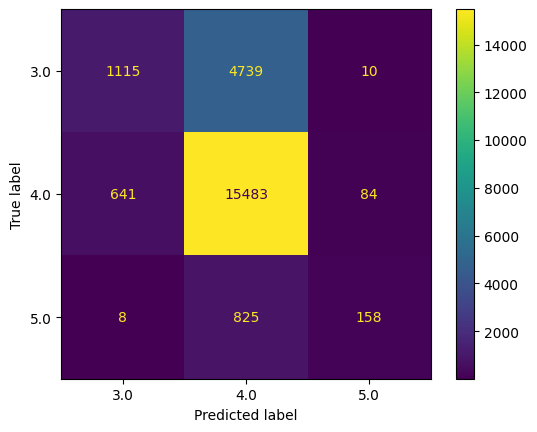

3.0_precision    0.632905
3.0_recall       0.190145
3.0_f1-score     0.292135
4.0_precision    0.735650
4.0_recall       0.955270
4.0_f1-score     0.831187
5.0_precision    0.636910
5.0_recall       0.159455
5.0_f1-score     0.253486
accuracy         0.726532
dtype: float64

In [33]:
y_pred, cvsnb_report = cross_val_report(cvsnb, X_filtered, y)
cvsnb_report

In [31]:
X_filtered

,pagesNumber,PublishYear,Authors,world_war,field_guide,science_fiction,berenstain_bear,step_step,life_time,short_introduction,...,along way,men woman,book also,award winning,new edition,nineteenth century,science fiction,real life,href http,brings together
0,0.0,13.0,8046.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,12.0,6185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,13.0,3220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,13.0,2368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13.0,15253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,0.0,12.0,6887.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,0.0,13.0,3613.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,0.0,12.0,2054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,0.0,13.0,7029.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
